In [ ]:
#Author : RIHI Ayoub
#e-mail : rihi001ayoub@gmail.com
#twitter : https://twitter.com/rihi_ayoub
#Date : May 10th, 2020
#https://github.com/rihi001
#

In [74]:
import numpy as np
import pandas as pd
from sklearn import datasets

boston = datasets.load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['target']=boston.target  
print(boston_df)


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   

In [ ]:
""" $$$$Metadata
CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centers
RAD index of accessibility to radial highways
TAX full-value property-tax rate per $10,000
PTRATIO pupil-teacher ratio by town
B 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
LSTAT % lower status of the population
MEDV Median value of owner-occupied homes in $1000’s
"""

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt 
correlation_matrix = boston_df.corr().round(2)
print(correlation_matrix)
#plt.figure(figsize=(14,12))
#sns.heatmap(data=correlation_matrix,annot=True)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

Text(0, 0.5, 'target')

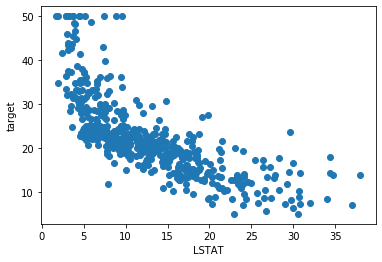

In [35]:
plt.scatter(boston_df.LSTAT,boston_df.target)
plt.xlabel('LSTAT')
plt.ylabel('target')

In [58]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(boston_df[["LSTAT"]],boston_df[["target"]])
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

lr.fit(xtrain,ytrain)

ypredict = lr.predict(xtest)


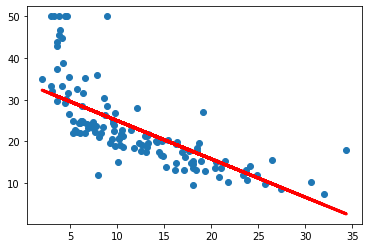

In [61]:
plt.scatter(xtest, ytest)  
 
plt.plot(xtest, ypredict, color='red', linewidth=3) 

In [145]:
#to see how much our prediction is close to the real targets 
ypredict = pd.DataFrame(ypredict)
for i in range(0,ypredict.size):
    print("\033[0;41;60m"+str(ytest.iloc[i])+"]")
    print("\033[0;42;60m predicted as =========> " +str(ypredict.iloc[i])+"\n")


target    22.8
Name: 72, dtype: float64]
 predicted as =========> 0    29.043768
Name: 0, dtype: float64

target    13.6
Name: 491, dtype: float64]
 predicted as =========> 0    17.540508
Name: 1, dtype: float64

target    11.9
Name: 505, dtype: float64]
 predicted as =========> 0    26.880605
Name: 2, dtype: float64

target    25.0
Name: 93, dtype: float64]
 predicted as =========> 0    28.411317
Name: 3, dtype: float64

target    13.1
Name: 395, dtype: float64]
 predicted as =========> 0    18.411272
Name: 4, dtype: float64

target    17.6
Name: 244, dtype: float64]
 predicted as =========> 0    22.645939
Name: 5, dtype: float64

target    22.7
Name: 358, dtype: float64]
 predicted as =========> 0    23.580865
Name: 6, dtype: float64

target    14.0
Name: 140, dtype: float64]
 predicted as =========> 0    11.958448
Name: 7, dtype: float64

target    15.0
Name: 10, dtype: float64]
 predicted as =========> 0    15.359013
Name: 8, dtype: float64

target    27.1
Name: 7, dtype: float64]


#Evaluation phase based on the MSE (Mean Squared Error)==> https://en.wikipedia.org/wiki/Mean_squared_error

In [147]:
from sklearn.metrics import mean_squared_error
print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred)))  


MSE: 44.31
